# Анализ рекламных источников мобильной игры "Космические братья"

## Описание проекта

В мобильной игре "Космические братья" провели тестовую закупку рекламы и сейчас необходимо оценить трафик, анализируя различия между каналами, предпочтительные стратегии пользователей, а также оценить затраты на различные каналы привлечения

## Цель проекта

Провести анализ источников перехода в игру для определения эффективности маркетинговых затрат.

## Описание данных

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

Победа над первым врагом

Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет <code>game_actions.csv</code>
<div>

* <code>event_datetime</code> — время события;

* <code>event</code> —  одно из трёх событий:
    * <code>building</code> — объект построен,
    * <code>finished_stage_1</code> — первый уровень завершён,
    * <code>project</code> — проект завершён;

* <code>building_type</code> — один из трёх типов здания:
    * <code>assembly_shop </code> — сборочный цех,
    * <code>spaceport </code> — космопорт,
    * <code>research_center </code> — исследовательский центр;

* <code>user_id</code> — идентификатор пользователя;
    
* <code>project_type</code> — тип реализованного проекта;    
    
</div>

Датасет <code>ad_costs.csv</code>
<div>

* <code>day</code> —  день, в который был совершен клик по объявлению,

* <code>source</code> —  источник трафика,
    
* <code>cost</code> — стоимость кликов;
    
</div>

Датасет <code>user_source.csv</code>
<div>

* <code>day</code> —  идентификатор пользователя,

* <code>source</code> —  источников, с которого пришёл пользователь, установивший приложение;
    
</div>

## План работы

<div>

* <b>Часть 1. Изучение данных</b>
    * Загрузка данных, получение общей информации о них;

* <b>Часть 2. Предобработка данных</b>
    * Проверить типы данных, откорректировать если нужно;
    * Проверка данных на пропуски;
    * Проверка данных на дубликаты;
    
* <b>Часть 3. Исследовательсктй анализ данных</b>
    * Обзор источников перехода в игру;
    * Формирование основных метрик для ранжирования каналов по "эффективности";
    * Сравнение метрик по каналам (среднее количество зданий на игрока, доли прошедших уровень) для ранжирования каналов по эффективности;
    * Сравнение долей стратегий для каналов с явным перекосом(при необходимости).
    
* <b>Часть 4. Проверка статистических гипотез</b>
    * Время завершения уровня различается в
зависимости способа прохождения;
    * Способ завершения уровня отличается в зависимости от источника, через который пришел пользователь.
    
* <b>Часть 5. Ответ на вопрос заказчика. Подробное описание ранжирования каналов с аргументацией</b>    
    
* <b>Часть 6. Общий вывод</b>
           
    
</div>

## Часть 1. Изучение данных

In [ ]:
# Необходимые библиотеки для исследования
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

In [ ]:
# Загрузка данных
pth1 = '/datasets/ad_costs.csv'
pth2 = 'ad_costs.csv'

pth3 = '/datasets/game_actions.csv'
pth4 = 'game_actions.csv'

pth5 = '/datasets/user_source.csv'
pth6 = 'user_source.csv'

if os.path.exists(pth1):
    ad_costs = pd.read_csv(pth1)
elif os.path.exists(pth2):
    ad_costs = pd.read_csv(pth2)

if os.path.exists(pth3):
    game_actions = pd.read_csv(pth3)
elif os.path.exists(pth4):
    game_actions = pd.read_csv(pth4)

if os.path.exists(pth5):
    user_source = pd.read_csv(pth5)
elif os.path.exists(pth6):
    user_source = pd.read_csv(pth6)


else:
    print('Что-то пошло не так')

In [ ]:
# Функция для показа общей информации о датасете
def dataset_info(dataset):
    # Вывод первых 10 строк датасета
    print("Первые 10 строк датасета:")
    print(dataset.head(10))

    # Вывод типов данных и общей информации о датасете
    print("\nТипы данных и общая информация:")
    print(dataset.info())

    # Вывод статистической информации о датасете
    print("\nСтатистическая информация:")
    print(dataset.describe())

    # Подсчет количества пропусков в датасете
    count=0
    for element in dataset.columns:
        if dataset[element].isna().sum() > 0:
            print('\n', element, '-', dataset[element].isna().sum(), 'пропусков')
            count=+1
    if count ==0:
        print('\nПропусков нет')

    # Подсчет количества дубликатов в датасете
    num_duplicates = dataset.duplicated().sum()
    print("\nКоличество дубликатов в датасете:", num_duplicates)


In [ ]:
dataset_info(ad_costs)l

Первые 10 строк датасета:
                  source         day        cost
0           facebook_ads  2020-05-03  935.882786
1           facebook_ads  2020-05-04  548.354480
2           facebook_ads  2020-05-05  260.185754
3           facebook_ads  2020-05-06  177.982200
4           facebook_ads  2020-05-07  111.766796
5           facebook_ads  2020-05-08   68.009276
6           facebook_ads  2020-05-09   38.723350
7  instagram_new_adverts  2020-05-03  943.204717
8  instagram_new_adverts  2020-05-04  502.925451
9  instagram_new_adverts  2020-05-05  313.970984

Типы данных и общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes
None

Статистическая информация:
             cost
count  

В датасете ad_costs 28 строк и 3 столбца, пропуски и дубликаты отсутствуют.

Затраты на различные источники имеют значительное разнообразие, от 23.31 у.е. до 969.14 у.е. В среднем, каждый день затраты на один источник составляют 271.56 у.е. Типичная стоимость одного источника составляет примерно 160.06 у.е.

In [ ]:
dataset_info(game_actions)

Первые 10 строк датасета:
        event_datetime     event  building_type  \
0  2020-05-04 00:00:01  building  assembly_shop   
1  2020-05-04 00:00:03  building  assembly_shop   
2  2020-05-04 00:00:16  building  assembly_shop   
3  2020-05-04 00:00:16  building  assembly_shop   
4  2020-05-04 00:00:35  building  assembly_shop   
5  2020-05-04 00:00:36  building  assembly_shop   
6  2020-05-04 00:00:36  building  assembly_shop   
7  2020-05-04 00:00:38  building  assembly_shop   
8  2020-05-04 00:00:44  building  assembly_shop   
9  2020-05-04 00:01:33  building  assembly_shop   

                                user_id project_type  
0  55e92310-cb8e-4754-b622-597e124b03de          NaN  
1  c07b1c10-f477-44dc-81dc-ec82254b1347          NaN  
2  6edd42cc-e753-4ff6-a947-2107cd560710          NaN  
3  92c69003-d60a-444a-827f-8cc51bf6bf4c          NaN  
4  cdc6bb92-0ccb-4490-9866-ef142f09139d          NaN  
5  06c592ca-902d-42bb-bac3-75ce84cca159          NaN  
6  4fe0f101-694b-4e31-9740-

В датасете game_actions 135640 строк, 5 столбцов. Есть пропуски - в столбцах building_type (7683) и project_type (133774). Эти пропуски означают отсутствие события с данным типом, поэтому их не трогаем. Есть одна строка с дубликатом. Столбец event_datetime стоит перевести в тип данных datetime.

Самым распространенным событием является "постройка" (building).

Среди различных типов построек, наиболее часто встречается "космопорт" (spaceport).

В проекте участвуют 13,576 уникальных игроков, с максимальным количеством событий на первом уровне равным 22.

Единственным типом проекта является "орбитальная сборка спутников" (satellite_orbital_assembly), которая была реализована всего лишь 1866 раз.

In [ ]:
dataset_info(user_source)

Первые 10 строк датасета:
                                user_id                   source
0  0001f83c-c6ac-4621-b7f0-8a28b283ac30             facebook_ads
1  00151b4f-ba38-44a8-a650-d7cf130a0105            yandex_direct
2  001aaea6-3d14-43f1-8ca8-7f48820f17aa  youtube_channel_reklama
3  001d39dc-366c-4021-9604-6a3b9ff01e25    instagram_new_adverts
4  002f508f-67b6-479f-814b-b05f00d4e995             facebook_ads
5  003b80c6-4164-4157-bb2a-03d0181d39c4            yandex_direct
6  003ee7e8-6356-4286-a715-62f22a18d2a1    instagram_new_adverts
7  004074f8-251a-4776-922c-8348dca1a2f6             facebook_ads
8  00440efd-aa50-4b4b-aae8-ffcd1782729d             facebook_ads
9  00464e5e-28ed-4be6-bf44-517ef7b3937b            yandex_direct

Типы данных и общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   so

В датасете user_source 13576 строк, 2 столбца. Пропусков и дубликатов нет. Уникальных игроков -  13576; уникальных каналов - 4, самый популярный - yandex_direct (4817 игроков)

## Часть 2. Предобработка данных

In [ ]:
#удалим дубликат
game_actions = game_actions.drop_duplicates()

In [ ]:
#поменяем тип данных
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])

In [ ]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 6.2+ MB


Проверим данные в game_actions на ошибки в записи. Если у нас тип события - постройка, то в столбце building_type не должно быть пустого значения

In [ ]:
game_actions[game_actions['event'] == 'building']['building_type'].unique()

array(['assembly_shop', 'spaceport', 'research_center'], dtype=object)

Также проверим событие project. В этом случае у нас не должно быть пустого значения в столбце project_type.

In [ ]:
game_actions[game_actions['event'] == 'project']['project_type'].unique()

array(['satellite_orbital_assembly'], dtype=object)

Данные не содержат ошибок в записи. Был удален дубликат, изменен тип данных в столбце event_datetime на datetime. Можно переходить к ииследовательскому анализу данных.

## Часть 3. Исследовательский анализ данных

### Обзор источников перехода в игру


Посмотрим на количество переходов по источникам трафика и их процентное соотношение

In [ ]:
fig = go.Figure(data=[go.Bar(x = user_source['source'].value_counts().index,
                             y = user_source['source'].value_counts().values,
                             text= user_source['source'].value_counts(),
                             textposition = 'outside',
                             )])
fig.update_layout(title_text='Количество переходов по источникам трафика', xaxis_title='Источник трафика', yaxis_title='Количество пользователей, шт.')
fig.show()

In [ ]:
user_source['source'].value_counts(normalize=True)

yandex_direct              0.354817
instagram_new_adverts      0.246538
facebook_ads               0.200796
youtube_channel_reklama    0.197849
Name: source, dtype: float64

Самый популярный источник, покоторому пришли пользователи - Яндекс.Директ(35%). Затем идет Инстаграм(примерно 25%), а доля пользователей, пришедших из Фейсбука и Ютуба приблизительно равна 20 %.

### Формирование основных метрик для ранжирования каналов по "эффективности"


Сформируем таблицу с параметрами, которые могут пригодиться для сравнения каналов привлечения

Даты первого и последнего события игрока:

In [ ]:
source_actions = user_source.merge(
    game_actions.sort_values(by=['user_id', 'event_datetime']).groupby('user_id')['event_datetime'].first(),
on='user_id', how='left')
source_actions = source_actions.rename(columns={'event_datetime':'first_date'})

In [ ]:
source_actions = source_actions.merge(
    game_actions.sort_values(by=['user_id', 'event_datetime']).groupby('user_id')['event_datetime'].last(),
on='user_id', how='left')
source_actions = source_actions.rename(columns={'event_datetime':'last_date'})

Количество зданий

In [ ]:
source_actions = source_actions.merge(
    game_actions[game_actions['event'] == 'building'].groupby('user_id')['event'].count(),
    how='left', on='user_id'
)
source_actions = source_actions.rename({'event': 'n_buildings'}, axis=1)

Количество дней в игре

In [ ]:
source_actions['days_in_game'] = source_actions['last_date'] - source_actions['first_date']
source_actions['days_in_game'] = source_actions['days_in_game'].dt.days

Дата завершения первого уровня, если есть

In [ ]:
source_actions = source_actions.merge(
    game_actions[game_actions['event'] == 'finished_stage_1'].sort_values(by=['user_id', 'event_datetime'])
    .groupby('user_id')['event_datetime'].first(), on='user_id', how='left')
source_actions = source_actions.rename(columns={'event_datetime' : 'date_finished_stage_1'})

Количество дней на завершение уровня

In [ ]:
source_actions['days_to_complete'] = (source_actions['date_finished_stage_1'] -
                                       source_actions['first_date']).dt.days + 1

Маркер того, что игрок прошел первый уровень

In [ ]:
source_actions['is_complete'] = source_actions['date_finished_stage_1'].notna() * 1

Дата завершения проекта

In [ ]:
source_actions = source_actions.merge(
    game_actions[game_actions['event'] == 'project'].sort_values(by=['user_id', 'event_datetime'])
    .groupby('user_id')['event_datetime'].first(), on='user_id', how='left')
source_actions = source_actions.rename(columns={'event_datetime' : 'date_project'})

Маркер того, что игрок прошел уровень через проект (PVE)

In [ ]:
source_actions['project_complete'] = source_actions['date_project'].notna() * 1

Посмотрим на получившуюся таблицу

In [ ]:
source_actions

,user_id,source,first_date,last_date,n_buildings,days_in_game,date_finished_stage_1,days_to_complete,is_complete,date_project,project_complete
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06 01:07:37,2020-05-20 11:26:06,13,14,NaT,NaN,0,NaT,0
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct,2020-05-06 03:09:12,2020-05-18 10:46:52,9,12,NaT,NaN,0,NaT,0
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama,2020-05-05 18:08:52,2020-05-14 09:21:27,4,8,NaT,NaN,0,NaT,0
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts,2020-05-05 21:02:05,2020-05-12 07:40:47,8,6,2020-05-12 07:40:47,7.0,1,NaT,0
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads,2020-05-05 13:49:58,2020-05-22 02:46:45,12,16,NaT,NaN,0,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,instagram_new_adverts,2020-05-04 01:58:59,2020-05-11 22:15:54,9,7,2020-05-11 22:15:54,8.0,1,NaT,0
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,facebook_ads,2020-05-04 11:58:14,2020-05-14 10:11:36,16,9,NaT,NaN,0,NaT,0
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,yandex_direct,2020-05-04 02:05:09,2020-05-12 13:01:52,9,8,2020-05-12 13:01:52,9.0,1,NaT,0
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts,2020-05-04 20:28:28,2020-05-11 22:04:30,7,7,NaT,NaN,0,NaT,0


Реклама показывается пользователю во время постройки здания. Посмотрим на средние значения количества зданий по каналам, как некую косвенную меру дохода.

In [ ]:
source_actions.groupby(['source'])['n_buildings'].mean()

source
facebook_ads               9.585840
instagram_new_adverts      9.505527
yandex_direct              9.348557
youtube_channel_reklama    9.299330
Name: n_buildings, dtype: float64

Количество зданий везде примерно одинаково.

Чтобы оценить вовлеченность игроков, посмотрим на доли прошедших уровень в зависимости от источника привлечения

In [ ]:
source_actions.groupby('source')['is_complete'].mean()

source
facebook_ads               0.421864
instagram_new_adverts      0.438004
yandex_direct              0.423915
youtube_channel_reklama    0.431497
Name: is_complete, dtype: float64

По всем источника доля тех игроков, кто завершил первй уровень, практически одинакова, и составляет 42-44 %.

Посмотрим, как варьруется среднее количество дней, проведенных в игре, в зависимости от источника

In [ ]:
source_actions.groupby('source')['days_in_game'].mean()

source
facebook_ads               10.223404
instagram_new_adverts      10.289812
yandex_direct              10.121652
youtube_channel_reklama    10.080045
Name: days_in_game, dtype: float64

По всем источникам данный показатель в среднем примерно равен 10 дням

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

In [ ]:
ad_costs['cost'].sum() / len(user_source)

0.5600749106355349

САС по источникам трафика c количеством пользователей

In [ ]:
cost_source_per_user = ad_costs.groupby('source')['cost'].sum() / user_source['source'].value_counts()
cost_source_per_user = cost_source_per_user.reset_index()
cost_source_per_user = cost_source_per_user.merge(user_source['source'].value_counts().reset_index())
cost_source_per_user = (cost_source_per_user.
                        rename(columns={'index':'source', 0:'cost_per_user', 'source': 'n_users'}))
cost_source_per_user

,source,cost_per_user,n_users
0,facebook_ads,0.785365,2726
1,instagram_new_adverts,0.645785,3347
2,yandex_direct,0.463590,4817
3,youtube_channel_reklama,0.397662,2686


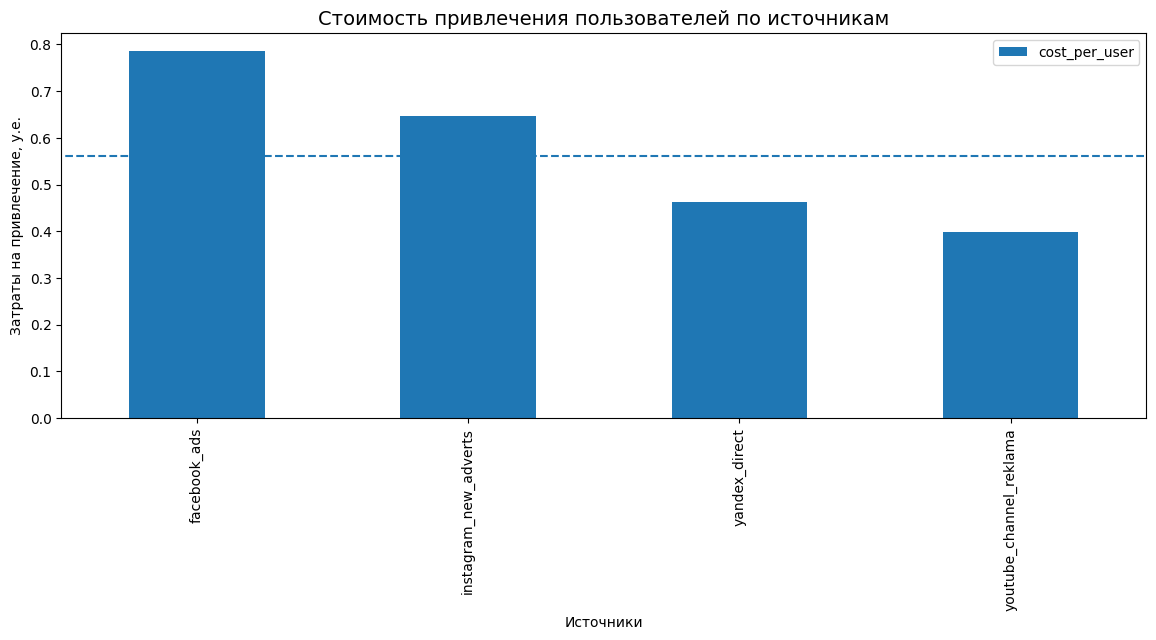

In [ ]:
cost_source_per_user.plot(y='cost_per_user', x='source', kind='bar', figsize=(14,5))
plt.hlines(ad_costs['cost'].sum() / len(user_source), -2, 5, linestyles='dashed')
plt.title('Стоимость привлечения пользователей по источникам', fontsize=14)
plt.ylabel('Затраты на привлечение, у.е.')
plt.xlabel('Источники')
plt.show()

Самым экономичным источником привлечения является реклама на YouTube, в то время как самым затратным источником на одного игрока является Facebook. Стоимость привлечения одного игрока через Facebook почти вдвое выше, чем через YouTube (0.4 у.е. против 0.79 у.е.). В то же время оба этих канала привлекли примерно одинаковое количество игроков за анализируемый период (2686 и 2726 человек соответственно).

Яндекс является следующим по стоимости дешевым источником, причем через него было привлечено максимальное количество игроков (4817 пользователей при стоимости привлечения 0.46 у.е.).

Инстаграм является дорогим источником (0.65 у.е. на игрока), однако через него пришло четверть всех игроков.

Стоимость привлечения игрока через Facebook значительно выше, и этот источник кажется наименее привлекательным.

## Часть 4. Проверка статистических гипотез

<b>Время завершения уровня различается в зависимости способа прохождения</b>

Для начала вспомним, какие есть способы прохождения. Первый - через завершение проекта (PVE), второй - через победу над соперником(PVP).Распределим данные по этому признаку и посмотрим на средние значения по времени прохождения уровня

In [ ]:
round(source_actions[source_actions['is_complete'] == 1].
      groupby('project_complete')['days_to_complete'].mean(), 0)

project_complete
0    12.0
1    14.0
Name: days_to_complete, dtype: float64

Те, кто использовал стратегию PVP, в среднем быстрее завершают уровень на два дня. Посмотрим на распределение по дням среди всех, кто завершил уровень

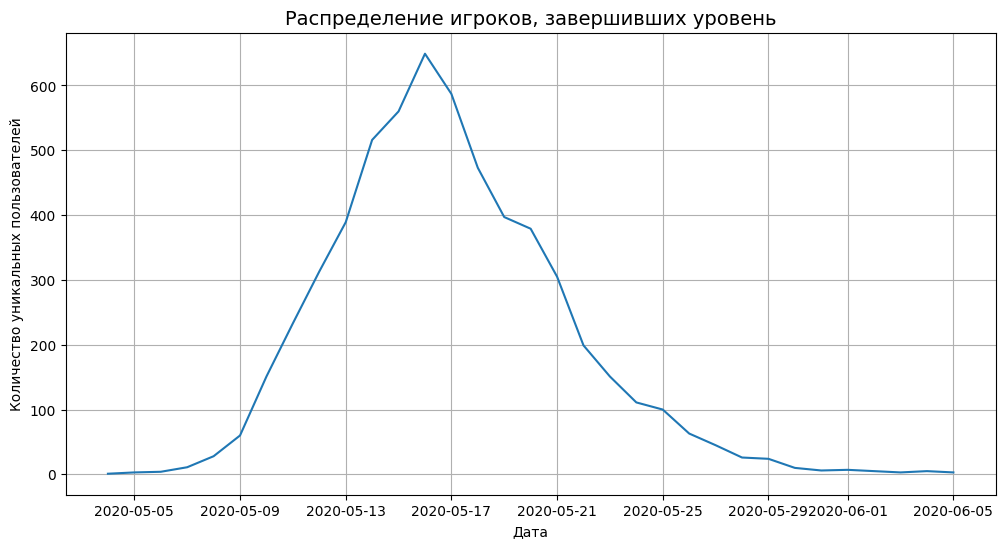

In [ ]:
# Преобразуем столбец 'last_date' в столбец времени
source_actions['last_date'] = pd.to_datetime(source_actions['last_date'])

# Сгруппируем данные по дате и подсчитаем количество уникальных пользователей
daily_counts = source_actions[source_actions['is_complete'] == 1]['last_date'].dt.date.value_counts().sort_index()

# Строим график распределения
fig, ax = plt.subplots(figsize=(12, 6))
daily_counts.plot(kind='line', ax=ax)


ax.set_title('Распределение игроков, завершивших уровень', fontsize=14)
ax.set_xlabel('Дата')
ax.set_ylabel('Количество уникальных пользователей')
ax.grid(True)


plt.show()


Распределение выглядит "нормально", можно использовать t-test для анализа статистической значимости

Формулируем гипотезы:

H0: Среднее время на завершение уровня через PVE равно среднему времени на завершение уровня через PVP

H0: Среднее время на завершение уровня через PVE неравно среднему времени на завершение уровня через PVP

Посмотрим на размер выборок

In [ ]:
#PVE
len(source_actions[(source_actions['is_complete'] == 1)
                       & (source_actions['project_complete'] == 1)])

1866

In [ ]:
#PVP
len(source_actions[(source_actions['is_complete'] == 1)
                       & (source_actions['project_complete'] == 0)])

3951

При небольшом объеме выборки вероятность получить случайные результаты выше, в то время как с увеличением объема выборки случайные отклонения компенсируют друг друга, и вероятность обнаружить значимые различия в выборках при их однородности становится ниже. Учитывая, что объем выборки игроков, реализовавших проект, составляет 1866, а игроков, победивших соперника, - 3951, мы выберем стандартный уровень значимости для проведения статистического анализа, который составляет 5%.

In [ ]:
alpha = 0.05

results = st.ttest_ind(source_actions[(source_actions['is_complete'] == 1)
                       & (source_actions['project_complete'] == 1)]['days_to_complete'],\
                       source_actions[(source_actions['is_complete'] == 1)
                       & (source_actions['project_complete'] == 0)]['days_to_complete'], equal_var = False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, различие между пользователями есть")
else:
    print("Не получилось отвергнуть нулевую гипотезу, различия между пользователями нет")

p-значение:  2.6237027268065695e-106
Отвергаем нулевую гипотезу, различие между пользователями есть


Проверим гипотезу о различии времени прохождения уровня пользователями в зависимости от рекламного источника

Сравним источники с самым высоким процентом (instagram_new_adverts (44%)) и самым низким (facebook_ads (42%))

Формулируем гипотезы:

H0: Различия во времени прохождения уровня пользователями в зависимости от рекламного источника нет

H0: Различия во времени прохождения уровня пользователями в зависимости от рекламного источника есть

Подготовим данные

In [ ]:
facebook = source_actions[['source', 'days_to_complete']].query('source == "facebook_ads"')
instagram = source_actions[['source', 'days_to_complete']].query('source == "instagram_new_adverts"')

Удалим пустые значения

In [ ]:
facebook = facebook.dropna()
facebook

,source,days_to_complete
7,facebook_ads,13.0
23,facebook_ads,10.0
61,facebook_ads,19.0
75,facebook_ads,10.0
82,facebook_ads,19.0
...,...,...
13516,facebook_ads,17.0
13539,facebook_ads,20.0
13542,facebook_ads,8.0
13544,facebook_ads,9.0


In [ ]:
instagram = instagram.dropna()
instagram

,source,days_to_complete
3,instagram_new_adverts,7.0
6,instagram_new_adverts,13.0
10,instagram_new_adverts,7.0
24,instagram_new_adverts,16.0
33,instagram_new_adverts,15.0
...,...,...
13531,instagram_new_adverts,10.0
13533,instagram_new_adverts,18.0
13548,instagram_new_adverts,6.0
13566,instagram_new_adverts,12.0


Воспользуемся ttest_ind с уровнем статистической значимости alpa = 0.05

In [ ]:
alpha = 0.05

results = st.ttest_ind(facebook['days_to_complete'], instagram['days_to_complete'], equal_var = False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, различие между пользователями есть")
else:
    print("Не получилось отвергнуть нулевую гипотезу, различия между пользователями нет")

p-значение:  0.7138947936389378
Не получилось отвергнуть нулевую гипотезу, различия между пользователями нет


## Часть 5. Ответ на вопрос заказчика. Подробное описание ранжирования каналов с аргументацией

В результате исследования были проранжированы каналы привлечения пользователей. Для этого использовалось несколько показателей, таких как среднее кол-во зданий на пользователя и процент завершаемости уровня.

Выяснилось, что эти метрики практически не отличаются в зависимости от каналов. Рассчитав САС(Стоимость привлечение клиента) по каналом обнаружилось, что реклама на YouTube является наиболее экономичным источником привлечения, в то время как Facebook является самым затратным источником на одного игрока. Стоимость привлечения одного игрока через Facebook почти в два раза выше, чем через YouTube (0,4 у.е. против 0,79 у.е.), при этом оба этих канала привлекли приблизительно одинаковое количество игроков за весь анализируемый период (2686 и 2726 человек соответственно).

Так же весьма эффективным выглядит канал Яндекс.Директ (показатель САС 0.46), который привел больше всего пользователей игры (4817)

Для отдела маркетинга рекомендуется пересмотреть расходы на каналы привлечения пользователей в пользу более эффектвных (YouTube и Яндекс.Директ)

## Часть 6. Общий вывод

1. Произведена загрузка и обработка данных:
данные проверены на ошибки записи
сконвертирован формат даты;
удален 1 дубликат строк.
2. Произведен исследовательский анализ данных, в ходе которого каналы привлечения пользователей сравнивались по "эффективности":

Самый популярный источник, покоторому пришли пользователи - Яндекс.Директ(35%). Затем идет Инстаграм(примерно 25%), а доля пользователей, пришедших из Фейсбука и Ютуба приблизительно равна 20 %.

Выяснилось, что количество зданий на игрока в зависимости от канала привлечения примерно одинаково.

Среднее количество дней, проведенных в игре, в зависимости от источника
практически идентично, и равно 10 дням.

Доли прошедших уровень в зависимости от источника привлечения находятся в районе 42-44% во всех источниках.

Самым экономичным источником привлечения является реклама на YouTube, в то время как самым затратным источником на одного игрока является Facebook. Стоимость привлечения одного игрока через Facebook почти вдвое выше, чем через YouTube (0.4 у.е. против 0.79 у.е.). В то же время оба этих канала привлекли примерно одинаковое количество игроков за анализируемый период (2686 и 2726 человек соответственно).

Яндекс является следующим по стоимости дешевым источником, причем через него было привлечено максимальное количество игроков (4817 пользователей при стоимости привлечения 0.46 у.е.).

Инстаграм является дорогим источником (0.65 у.е. на игрока), однако через него пришло четверть всех игроков.

Стоимость привлечения игрока через Facebook значительно выше, и этот источник кажется наименее привлекательным.

4. Проверка статистических гипотез

1 гипотеза:
Среднее время на завершение уровня через PVE равно среднему времени на завершение уровня через PVP

Для выбранного критерия значимости на уровне 5% проведенный тест позволил отбросить нулевую гипотезу и сделать вывод о том, что среднее время на завершение уровня через проект (PVE) не равно среднему времени на завершение уровня через победу над другим игроком (PVP)

2 гипотеза:

Различия во времени прохождения уровня пользователями в зависимости от рекламного источника нет. (Сравниваем два источника, Инстаграм и Фейсбук)

Для выбранного критерия значимости на уровне 5% проведенный тест не позволил отвергнуть нулевую гипотезу, различий во времени прохождения уровня между пользователями этих каналов нет.

5. Для отдела маркетинга рекомендуется пересмотреть расходы на каналы привлечения пользователей в пользу более эффектвных (YouTube и Яндекс.Директ)